In [2]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions
from Bio.PDB.Polypeptide import one_to_three
from Bio.PDB.Polypeptide import three_to_one
from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
from small_script.myFunctions import *
from collections import defaultdict
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [3]:
plt.rcParams['figure.figsize'] = [16.18033, 10]    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100

In [4]:

pre = "/Users/weilu/Research/server/may_2019/multi_iter0/multiLetter/gammas/"
g = np.load(pre+ "filtered_gamma.npy")

In [6]:
g.shape

(10320,)

In [13]:
# direct_contact = np.zeros((16,20,20))
# protein_contact = np.zeros((16,20,20))
# water_contact = np.zeros((16,20,20))
# burial_gamma = np.zeros((4,3,20))

# c = 0
# for ii in range(4):
#     for jj in range(4):
#         for i in range(20):
#             for j in range(i, 20):
#                 direct_contact[4*ii+jj][i][j] = g[c]
#                 direct_contact[4*ii+jj][j][i] = g[c]
#                 c += 1

# for ii in range(4):
#     for jj in range(4):
#         for i in range(20):
#             for j in range(i, 20):
#                 protein_contact[4*ii+jj][i][j] = g[c]
#                 protein_contact[4*ii+jj][j][i] = g[c]
#                 c += 1

# for ii in range(4):
#     for jj in range(4):
#         for i in range(20):
#             for j in range(i, 20):
#                 water_contact[4*ii+jj][i][j] = g[c]
#                 water_contact[4*ii+jj][j][i] = g[c]
#                 c += 1

# for ii in range(4):
#         for i in range(3):
#             for j in range(20):
#                 burial_gamma[ii][i][j] = g[c]
#                 c += 1

In [27]:
# direct_contact_2 = np.zeros((16,20,20))
# protein_contact_2 = np.zeros((16,20,20))
# water_contact_2 = np.zeros((16,20,20))
# burial_gamma = np.zeros((4,3,20))

# c = 0
# for ii in range(4):
#     for jj in range(ii, 4):
#         for i in range(20):
#             for j in range(i, 20):
#                 direct_contact_2[4*ii+jj][i][j] = g[c]
#                 direct_contact_2[4*ii+jj][j][i] = g[c]
#                 direct_contact_2[4*jj+ii][i][j] = g[c]
#                 direct_contact_2[4*jj+ii][j][i] = g[c]
#                 c += 1

# for ii in range(4):
#     for jj in range(ii, 4):
#         for i in range(20):
#             for j in range(i, 20):
#                 protein_contact_2[4*ii+jj][i][j] = g[c]
#                 protein_contact_2[4*ii+jj][j][i] = g[c]
#                 protein_contact_2[4*jj+ii][i][j] = g[c]
#                 protein_contact_2[4*jj+ii][j][i] = g[c]
#                 c += 1

# for ii in range(4):
#     for jj in range(ii, 4):
#         for i in range(20):
#             for j in range(i, 20):
#                 water_contact_2[4*ii+jj][i][j] = g[c]
#                 water_contact_2[4*ii+jj][j][i] = g[c]
#                 water_contact_2[4*jj+ii][i][j] = g[c]
#                 water_contact_2[4*jj+ii][j][i] = g[c]
#                 c += 1

# for ii in range(4):
#         for i in range(3):
#             for j in range(20):
#                 burial_gamma[ii][i][j] = g[c]
#                 c += 1

In [39]:
# # incorrect, should not use anymore.
# direct_contact_2 = np.zeros((16,20,20))
# protein_contact_2 = np.zeros((16,20,20))
# water_contact_2 = np.zeros((16,20,20))
# burial_gamma = np.zeros((4,3,20))

# c = 0
# for ii in range(4):
#     for jj in range(4):
#         for i in range(20):
#             for j in range(i, 20):
#                 direct_contact_2[4*ii+jj][i][j] = g[c]
#                 direct_contact_2[4*ii+jj][j][i] = g[c]
#                 direct_contact_2[4*jj+ii][i][j] = g[c]
#                 direct_contact_2[4*jj+ii][j][i] = g[c]
#                 c += 1

# for ii in range(4):
#     for jj in range(4):
#         for i in range(20):
#             for j in range(i, 20):
#                 protein_contact_2[4*ii+jj][i][j] = g[c]
#                 protein_contact_2[4*ii+jj][j][i] = g[c]
#                 protein_contact_2[4*jj+ii][i][j] = g[c]
#                 protein_contact_2[4*jj+ii][j][i] = g[c]
#                 c += 1

# for ii in range(4):
#     for jj in range(4):
#         for i in range(20):
#             for j in range(i, 20):
#                 water_contact_2[4*ii+jj][i][j] = g[c]
#                 water_contact_2[4*ii+jj][j][i] = g[c]
#                 water_contact_2[4*jj+ii][i][j] = g[c]
#                 water_contact_2[4*jj+ii][j][i] = g[c]
#                 c += 1

# for ii in range(4):
#         for i in range(3):
#             for j in range(20):
#                 burial_gamma[ii][i][j] = g[c]
#                 c += 1

In [65]:

pre = "/Users/weilu/Research/server/may_2019/multi_iter0/multiLetter_symmetric/gammas/"
g = np.load(pre+ "filtered_gamma.npy")

In [113]:
direct_contact = np.zeros((80,80))
protein_contact = np.zeros((80,80))
water_contact = np.zeros((80,80))
# burial_gamma = np.zeros((4,3,20))
burial_gamma = np.zeros((3,80))
c = 0
for i in range(80):
    for j in range(i, 80):
        direct_contact[i][j] = g[c]
        direct_contact[j][i] = g[c]
        c += 1


for i in range(80):
    for j in range(i, 80):
        protein_contact[i][j] = g[c]
        protein_contact[j][i] = g[c]
        c += 1


for i in range(80):
    for j in range(i, 80):
        water_contact[i][j] = g[c]
        water_contact[j][i] = g[c]
        c += 1

# not used in the future
for ii in range(4):
        for i in range(3):
            for j in range(20):
                burial_gamma[i][ii*20+j] = g[c]
                c += 1

In [84]:
21%20

1

In [88]:
40//20

2

In [95]:
from collections import defaultdict


In [98]:
c = 0
dct = defaultdict(list)
for i in range(80):
    for j in range(i, 80):
        res1_neighbor_type = i // 20
        res2_neighbor_type = j // 20
        res1 = i % 20
        res2 = j % 20

        dct[(res1_neighbor_type,res2_neighbor_type)].append(g[c])
        c += 1
for i in range(80):
    for j in range(i, 80):
        res1_neighbor_type = i // 20
        res2_neighbor_type = j // 20
        res1 = i % 20
        res2 = j % 20
        dct[(res1_neighbor_type,res2_neighbor_type)].append(g[c])
        c += 1
for i in range(80):
    for j in range(i, 80):
        res1_neighbor_type = i // 20
        res2_neighbor_type = j // 20
        res1 = i % 20
        res2 = j % 20
        dct[(res1_neighbor_type,res2_neighbor_type)].append(g[c])
        c += 1
# for ii in range(4):
#         for i in range(3):
#             for j in range(20):
#                 burial_gamma[i][ii*20+j] = g[c]
#                 c += 1

In [100]:
np.savetxt("/Users/weilu/Research/server/may_2019/openMM_multiLetter/gammas/ni_0_nj_0", dct[(0,0)])




In [102]:
for i in range(4):
    for j in range(i, 4):
        np.savetxt(f"/Users/weilu/Research/server/may_2019/openMM_multiLetter/gammas/ni_{i}_nj_{j}", dct[(i,j)])


In [103]:
pwd

'/Users/weilu/opt/notebook/Optimization'

In [104]:
c = 0
dct = defaultdict(list)
for i in range(80):
    for j in range(i, 80):
        res1_neighbor_type = i // 20
        res2_neighbor_type = j // 20
        res1 = i % 20
        res2 = j % 20

        dct[(res1_neighbor_type,res2_neighbor_type)].append(g[c])
        c += 1

In [107]:
len(dct[(0,1)])

400

In [114]:
dct = defaultdict(list)
for ii in range(4):
    for jj in range(ii, 4):
        for i in range(20):
            for j in range(i, 20):
                tmp = direct_contact[20*ii+i][20*jj+j]
                dct[(ii,jj)].append(tmp)
for ii in range(4):
    for jj in range(ii, 4):
        for i in range(20):
            for j in range(i, 20):
                tmp = protein_contact[20*ii+i][20*jj+j]
                dct[(ii,jj)].append(tmp)
for ii in range(4):
    for jj in range(ii, 4):
        for i in range(20):
            for j in range(i, 20):
                tmp = water_contact[20*ii+i][20*jj+j]
                dct[(ii,jj)].append(tmp)

In [116]:
for i in range(4):
    for j in range(i, 4):
        np.savetxt(f"/Users/weilu/Research/server/may_2019/openMM_multiLetter/gammas/correct_ni_{i}_nj_{j}", dct[(i,j)])


In [115]:
len(dct[(0,1)])

630

In [93]:
len(ni0_nj0)

210

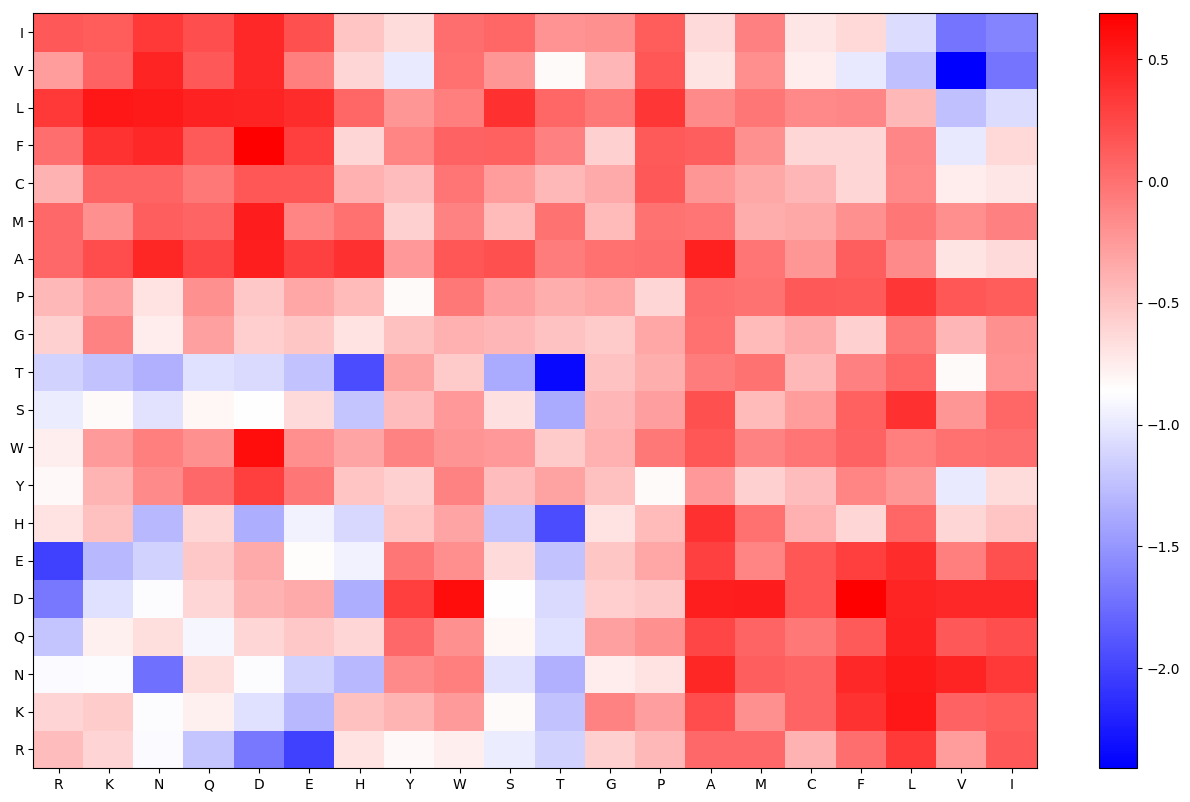

In [94]:
plot_contact_well(ni0_nj0, inferBound=True, invert_sign=False)

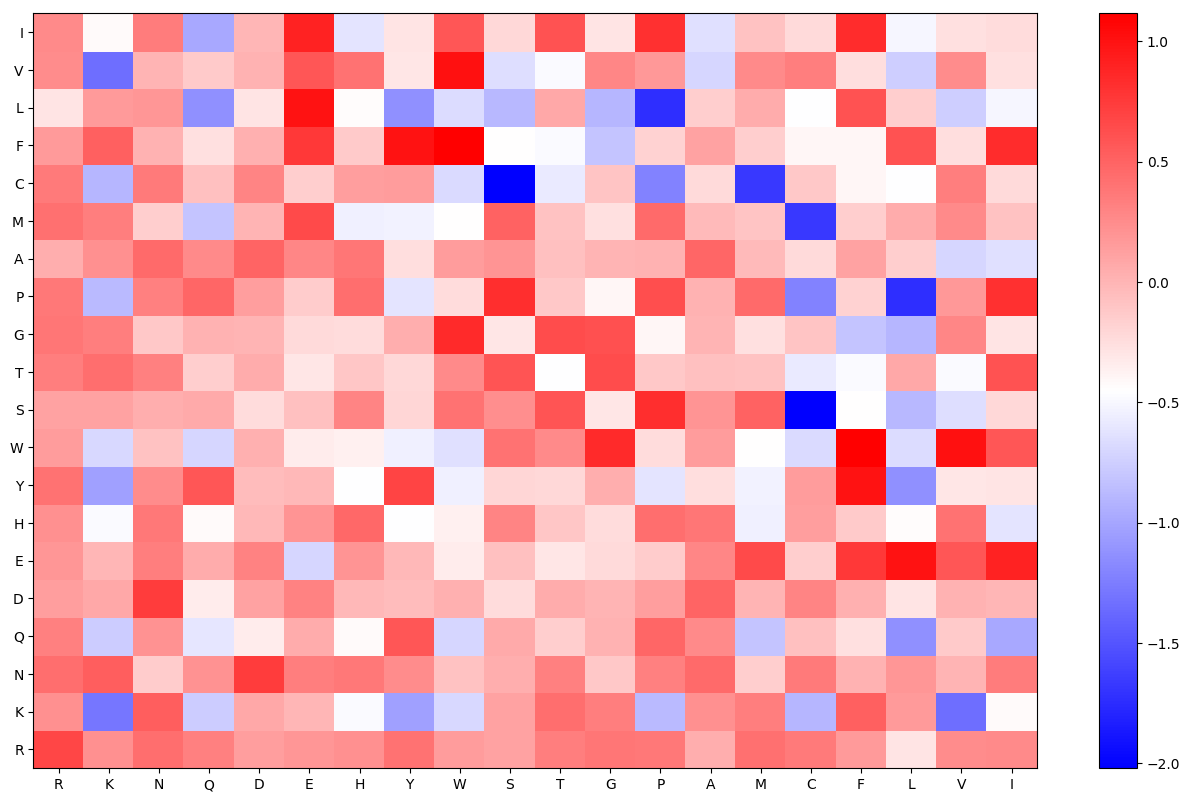

In [83]:
plot_contact_well(g[:210], inferBound=True, invert_sign=False)

In [ ]:
direct_contact

In [78]:
burial_gamma[0]

array([ 0.36879388, -0.09751481, -0.20870196, -0.496142  , -0.00829436,
       -0.120054  , -0.26308542, -0.28426693,  0.14372142,  0.0123174 ,
       -0.04423901, -0.18026432, -0.200955  , -0.08123462, -0.29402321,
       -0.11284752,  0.02640513, -0.13191867, -0.21287602, -0.05340107,
       -0.29328326, -0.76270868, -0.77889434, -1.04303934, -0.19901381,
       -0.83369622, -1.03053435, -0.45400601, -0.33622764, -0.23641592,
       -0.43640123, -1.04979994, -0.52401767, -0.33042205, -0.86388863,
       -0.73243846, -0.54927641, -0.43845696, -0.55158207, -0.31474666,
        0.00589466, -0.4971077 , -0.53475314, -0.67368371, -0.2212954 ,
       -0.60934034, -0.85487773, -0.40923972, -0.17354116, -0.27760054,
       -0.42051743, -0.72739378, -0.49069792, -0.39657133, -0.27420799,
       -0.36072062, -0.25246973, -0.64098155, -0.60981448, -0.35291224,
       -0.32663561, -0.60409931, -0.70739314, -0.89904132, -0.30509155,
       -0.77712105, -1.0463444 , -0.74418751, -0.36635213, -0.42

In [79]:
bb[:,0,:]

array([[ 0.36879388, -0.09751481, -0.20870196, -0.496142  , -0.00829436,
        -0.120054  , -0.26308542, -0.28426693,  0.14372142,  0.0123174 ,
        -0.04423901, -0.18026432, -0.200955  , -0.08123462, -0.29402321,
        -0.11284752,  0.02640513, -0.13191867, -0.21287602, -0.05340107],
       [-0.29328326, -0.76270868, -0.77889434, -1.04303934, -0.19901381,
        -0.83369622, -1.03053435, -0.45400601, -0.33622764, -0.23641592,
        -0.43640123, -1.04979994, -0.52401767, -0.33042205, -0.86388863,
        -0.73243846, -0.54927641, -0.43845696, -0.55158207, -0.31474666],
       [ 0.00589466, -0.4971077 , -0.53475314, -0.67368371, -0.2212954 ,
        -0.60934034, -0.85487773, -0.40923972, -0.17354116, -0.27760054,
        -0.42051743, -0.72739378, -0.49069792, -0.39657133, -0.27420799,
        -0.36072062, -0.25246973, -0.64098155, -0.60981448, -0.35291224],
       [-0.32663561, -0.60409931, -0.70739314, -0.89904132, -0.30509155,
        -0.77712105, -1.0463444 , -0.74418751, -

In [74]:
bb = burial_gamma

In [67]:
c

9960

In [68]:
g.shape

(9960,)

In [80]:
pre = "/Users/weilu/Research/server/may_2019/openMM_multiLetter/symmetric/"
np.save(pre+"/direct.npy", direct_contact)
np.save(pre+"/protein.npy", protein_contact)
np.save(pre+"/water.npy", water_contact)
np.save(pre+"/burial.npy", burial_gamma)

In [70]:
sum(direct_contact-direct_contact.T)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [71]:
sum(water_contact-water_contact.T)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [72]:
sum(protein_contact-protein_contact.T)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [40]:
a = (water_contact-water_contact_2)

In [41]:
a.shape

(16, 20, 20)

In [42]:
a.sum(axis=1).sum(axis=1)

array([ 0.        , 10.35640198, 57.60409142, 57.58835188,  0.        ,
        0.        , 12.38775027, -2.57383682,  0.        ,  0.        ,
        0.        ,  1.24468822,  0.        ,  0.        ,  0.        ,
        0.        ])

In [43]:
pre = "/Users/weilu/Research/server/may_2019/openMM_multiLetter/expand_contact/"
np.save(pre+"/direct.npy", direct_contact_2)
np.save(pre+"/protein.npy", protein_contact_2)
np.save(pre+"/water.npy", water_contact_2)
np.save(pre+"/burial.npy", burial_gamma)

In [21]:
pre = "/Users/weilu/Research/server/may_2019/openMM_multiLetter/"
np.save(pre+"/direct.npy", direct_contact)
np.save(pre+"/protein.npy", protein_contact)
np.save(pre+"/water.npy", water_contact)
np.save(pre+"/burial.npy", burial_gamma)

In [23]:
np.load(pre+"direct.npy").shape

(16, 20, 20)

In [26]:
np.load(pre+"burial.npy").shape

(4, 3, 20)

In [3]:
data = np.loadtxt("/Users/weilu/Research/server/may_2019/rewrite_phis_computation_reading/phis/proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0_phi_decoy_all_summary.txt")

In [4]:
data.shape

(468000, 690)

In [5]:
d2 = np.sum(data, axis=0) 

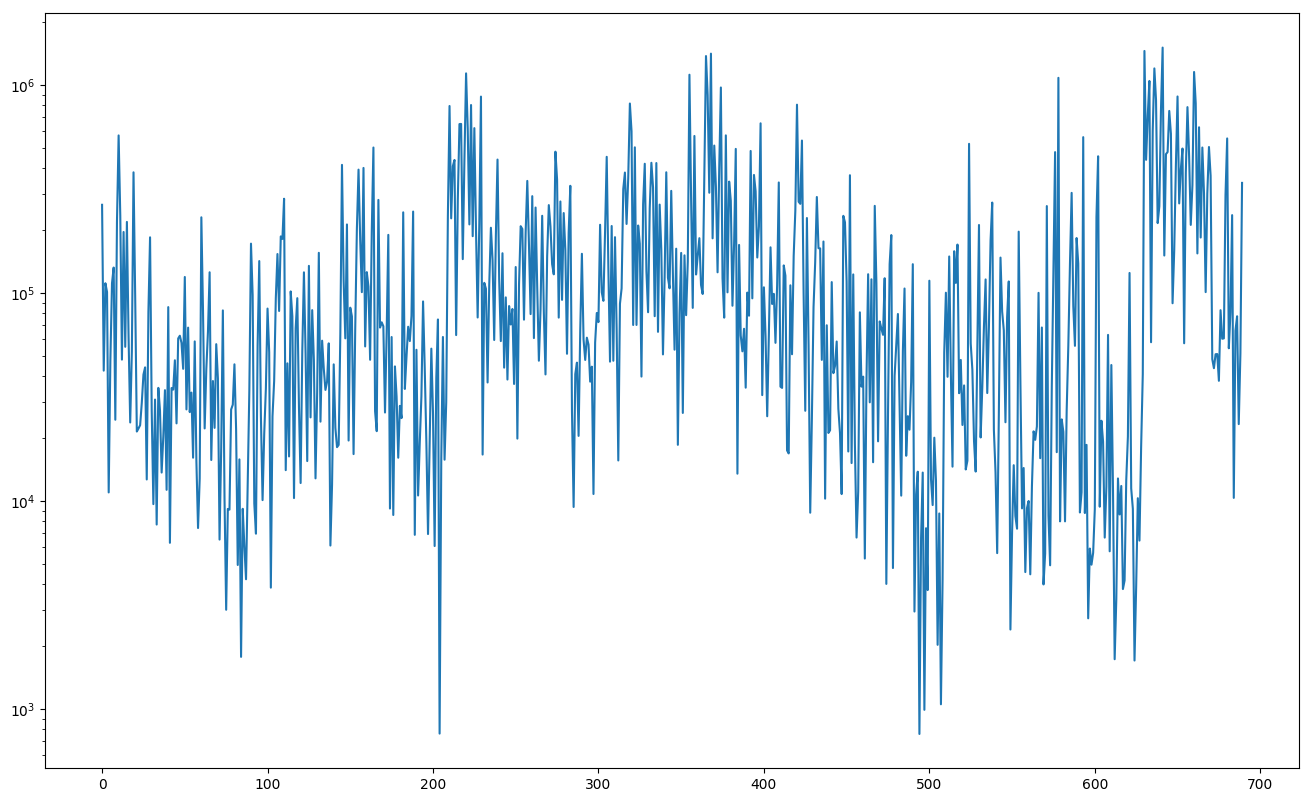

In [8]:
plt.plot(d2)
plt.yscale("log")

In [48]:
folder = "/Users/weilu/Research/server/may_2019/multi_iter0/multiLetter_symmetric"

In [44]:
i = 0
location = f"{folder}/proteins_name_list/proteins_name_list_{i}.txt"
with open(location, "r") as f:
    a = f.readlines()
size = len(a)
# print(size)
pre = f"{folder}/sub_gamma"
base = pre + f"/proteins_name_list_{i}_phi_pairwise_contact_multiLetter_well4.5_6.5_5.0_10phi_density_mediated_contact_multiLetter_well6.5_9.5_5.0_10_2.6_7.0phi_burial_multiLetter_well4.0"
a_name = base + "_A"
a_prime_name = base + "_A_prime"
std_half_b_name = base + "_std_half_B"
half_b = base + "_half_B"
other_half_b = base + "_other_half_B"

A = size * np.loadtxt(a_name)
A_prime = size * np.loadtxt(a_prime_name)
std_half_B = np.loadtxt(std_half_b_name)
half_B = np.loadtxt(half_b)
other_half_B = np.loadtxt(other_half_b)


In [49]:
count = 1
for i in range(1, 362):
    location = f"{folder}/proteins_name_list/proteins_name_list_{i}.txt"
    with open(location, "r") as f:
        a = f.readlines()
    size = len(a)
    # print(size)
    pre = f"{folder}/sub_gamma"
    base = pre + f"/proteins_name_list_{i}_phi_pairwise_contact_multiLetter_well4.5_6.5_5.0_10phi_density_mediated_contact_multiLetter_well6.5_9.5_5.0_10_2.6_7.0phi_burial_multiLetter_well4.0"
    a_name = base + "_A"
    a_prime_name = base + "_A_prime"
    std_half_b_name = base + "_std_half_B"
    half_b = base + "_half_B"
    other_half_b = base + "_other_half_B"
    try:
        std_half_B = np.loadtxt(std_half_b_name)
        A += size * np.loadtxt(a_name)
        A_prime += size * np.loadtxt(a_prime_name)
        half_B += np.loadtxt(half_b)
        other_half_B += np.loadtxt(other_half_b)
        count += 1
        print(i, "done")
    except:
        print(i, "not found")
    

1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
51 done
52 done
53 done
54 done
55 done
56 done
57 done
58 done
59 done
60 done
61 done
62 done
63 done
64 done
65 done
66 done
67 done
68 done
69 done
70 done
71 done
72 done
73 done
74 done
75 done
76 done
77 done
78 done
79 done
80 done
81 done
82 done
83 done
84 done
85 done
86 done
87 done
88 done
89 done
90 done
91 done
92 done
93 done
94 done
95 done
96 not found
97 not found
98 not found
99 not found
100 not found
101 not found
102 not found
103 not found
104 not found
105 not found
106 not found
107 not found
108 done
109 done
110 done
111 done
112 done
113 done
114 done
115 done
116 done
117 

In [50]:
count

350

In [51]:
folder = "/Users/weilu/Research/server/may_2019/multi_iter0/multiLetter_symmetric"
pre = f"{folder}/gammas/"
n = count*5
A /= n
A_prime /= n
std_half_B /= n
half_B /= n
other_half_B /= n

np.save(pre+ "A", A)
np.save(pre+ "A_prime", A_prime)
np.save(pre+ "std_half_B", std_half_B)
np.save(pre+ "half_B", half_B)
np.save(pre+ "other_half_B", other_half_B)

In [52]:
B = half_B - other_half_B
gamma = np.dot(np.linalg.pinv(B), A)

In [53]:
gamma

array([ 0.47007102,  0.03780206,  0.44285095, ..., -1.34694915,
       -1.21084701, -1.94769826])

In [54]:
lamb, P = np.linalg.eig(B)
lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)

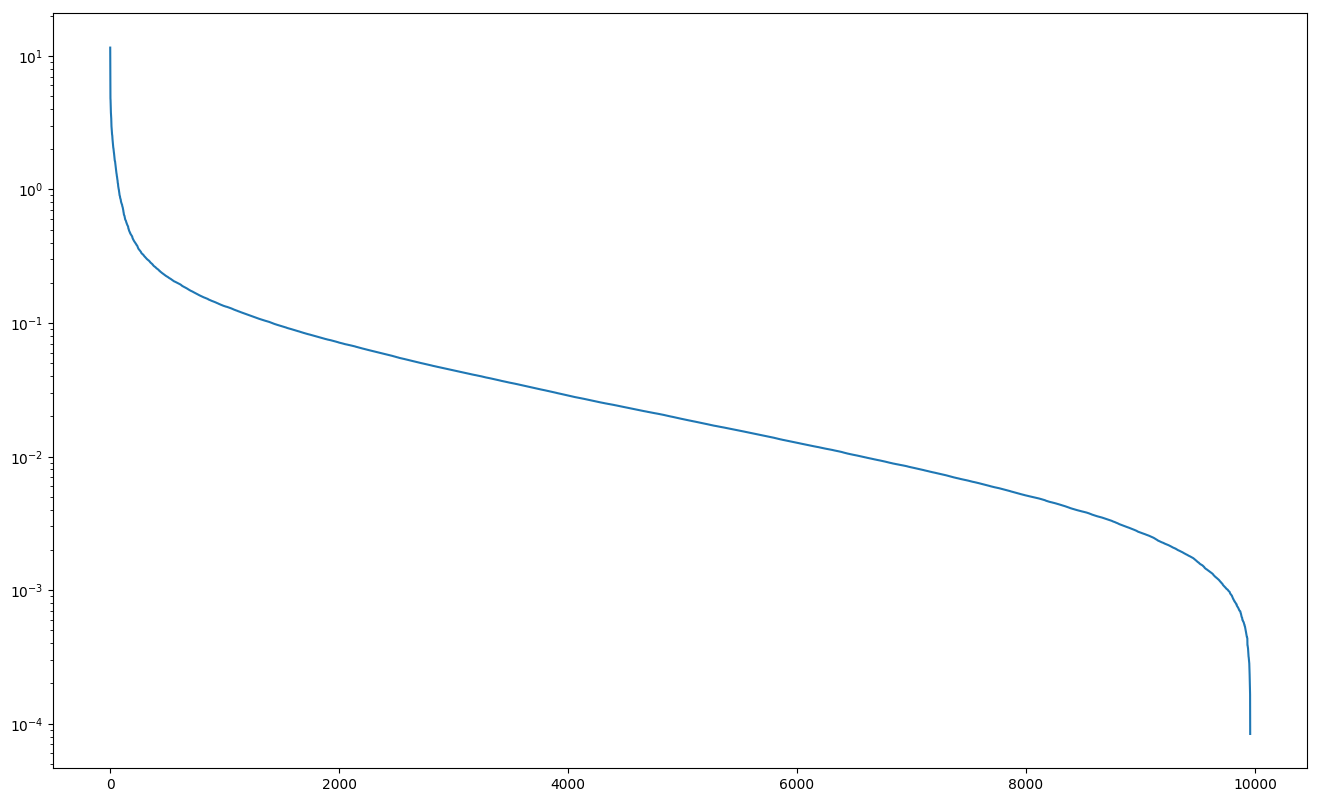

In [55]:
plt.plot(lamb)
plt.yscale("log")

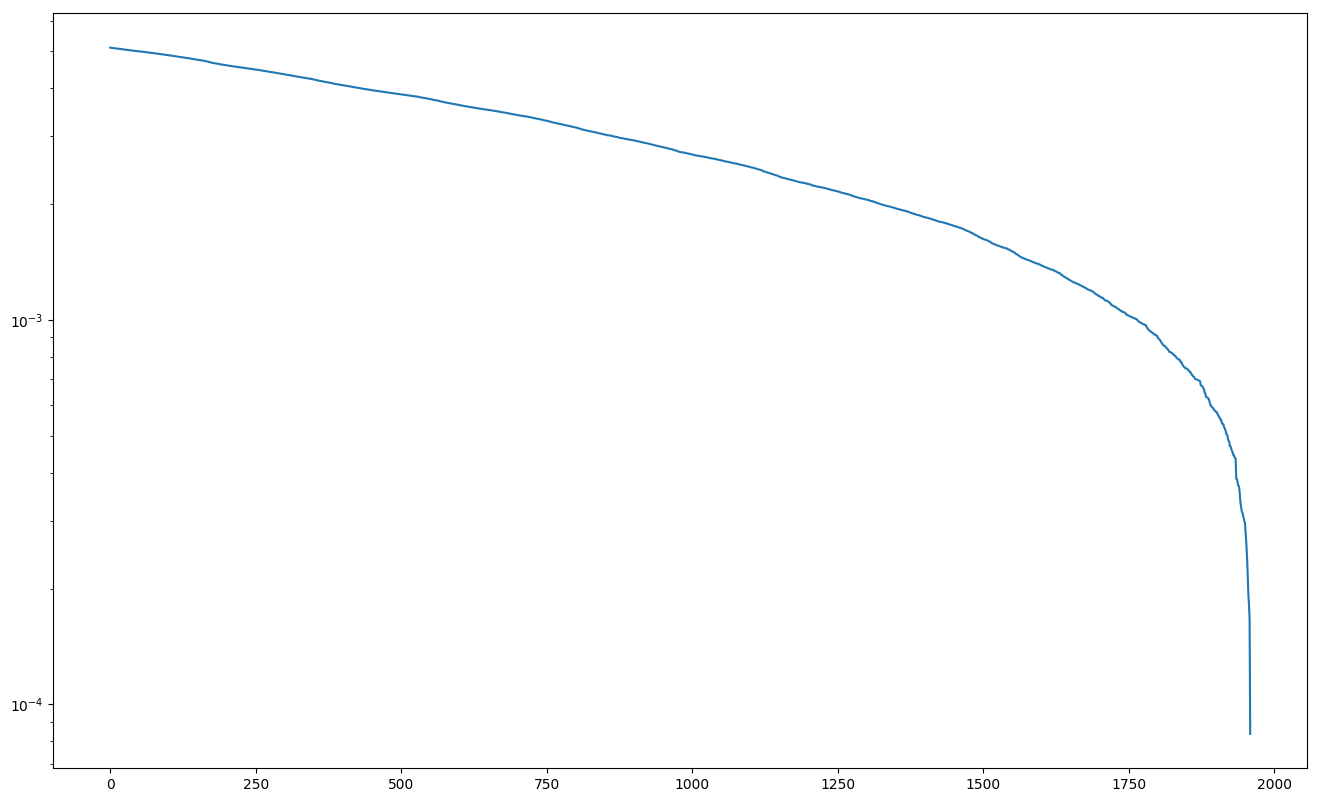

In [56]:
plt.plot(lamb[8000:])
plt.yscale("log")

In [57]:
cutoff_mode = 9500
filtered_lamb = np.copy(lamb)
filtered_B_inv, filtered_lamb, P = get_filtered_B_inv_lambda_and_P(
    filtered_lamb, cutoff_mode, P)

filtered_gamma = np.dot(filtered_B_inv, A)

In [58]:
filtered_gamma

array([ 0.48526619,  0.04773866,  0.45574379, ..., -0.89607113,
       -0.77330225, -1.51224099])

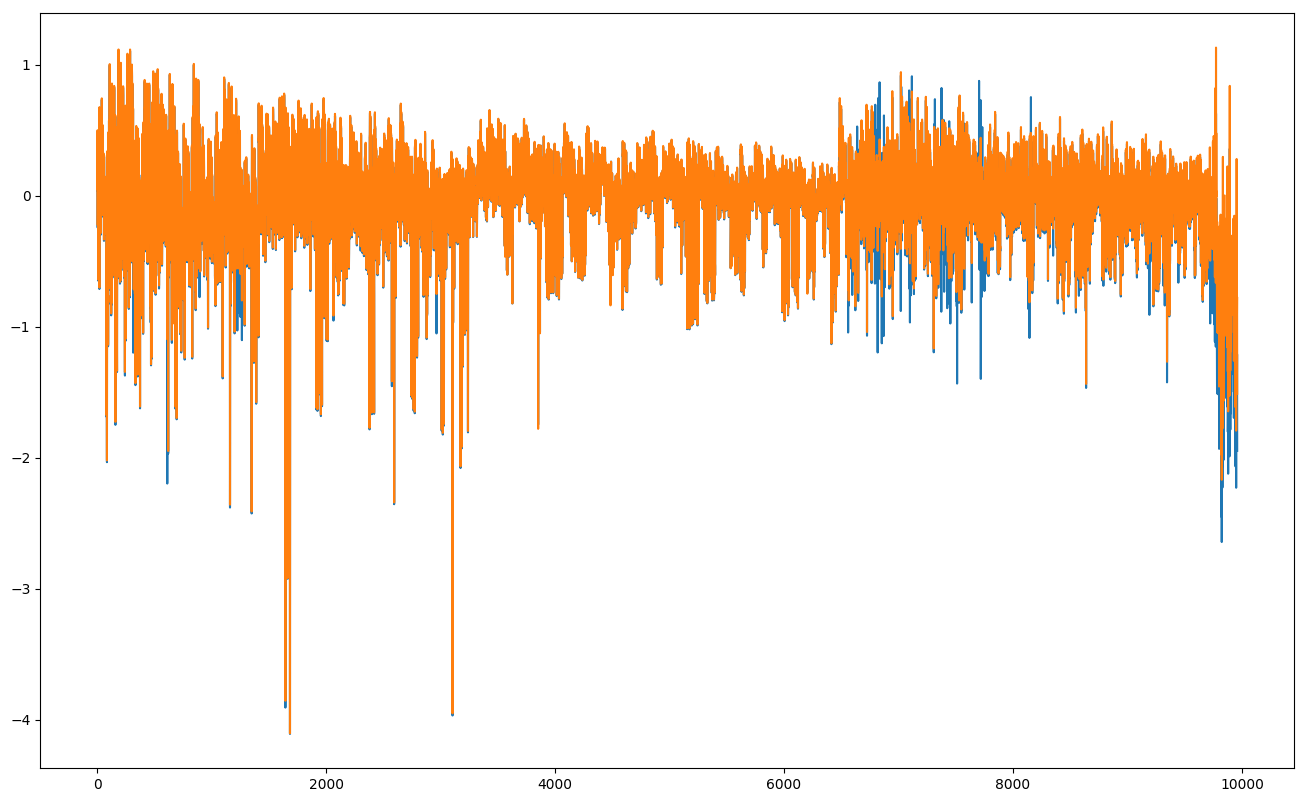

In [59]:
plt.plot(gamma)
plt.plot(filtered_gamma)

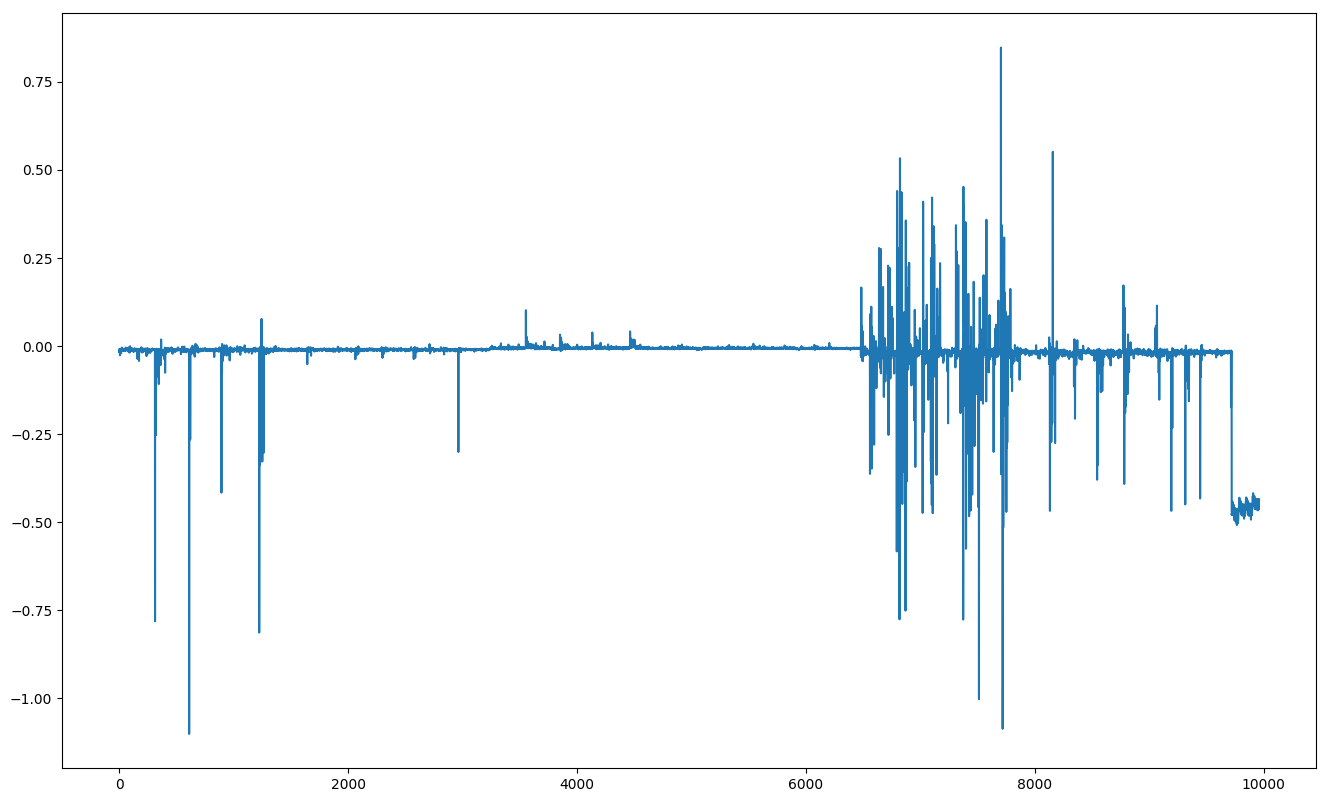

In [60]:
plt.plot(gamma-filtered_gamma)

In [61]:
pre = f"{folder}/gammas/"
np.save(pre+ "filtered_gamma", filtered_gamma)

In [62]:
A.dot(filtered_gamma)

48.17029503500869

In [64]:
A.dot(filtered_gamma)/(filtered_gamma.dot(B).dot(filtered_gamma))**0.5

6.946067912255422

In [63]:
A_prime.dot(filtered_gamma)

-107.73767675764009

# not too bad. each phi has at least 10^3 entry from 4.7e5.

In [ ]:
len(training_set)

In [ ]:
total_phis

In [ ]:
num_decoys